# Stack Overflow

## Introduction 

In this assignment, we will look at some posts on Stack Overflow during the year of 2015 and measure the similarity of users by looking at the types of questions they answer. Do not delete the output of your code cells. This assignment is to be completed **INDIVIDUALLY** and it is due on **September 30**.

Please update the README with your BU username.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/mcrovella/CS505-Computational-Tools-for-Data-Science/blob/master/2-Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [1]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")

print(response)

<Response [200]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [2]:
print(response.text)

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":101,"user_id":3210431,"user_type":"registered","accept_rate":78,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"http://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":236,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"http://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":568,"answer_count":1,"score":1,"last_activity_date":

It is not possible to read the raw response. Instead, we need to decode the raw response as JSON and use the `json` library to print it.

In [3]:
import json

json_response = response.json()

print(json.dumps(json_response, indent = 2))

{
  "quota_max": 300,
  "quota_remaining": 292,
  "has_more": true,
  "items": [
    {
      "is_answered": true,
      "tags": [
        "php",
        "mysql",
        "arrays",
        "mysqli"
      ],
      "title": "Inserting multiple records into MySQL from an array",
      "score": 0,
      "view_count": 236,
      "link": "http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
      "accepted_answer_id": 27727478,
      "creation_date": 1420070458,
      "last_activity_date": 1420071815,
      "owner": {
        "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
        "display_name": "salep",
        "user_type": "registered",
        "reputation": 101,
        "link": "http://stackoverflow.com/users/3210431/salep",
        "accept_rate": 78,
        "user_id": 3210431
      },
      "question_id": 27727385,
      "answer_count": 2
    },
    {
      "is_answered": false,
      "creation_date": 1420070503,
      "owne

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [9]:
import json

def print_creation_dates_json(response):
    json_response = response.json()
    for x in json_response['items']:
        print(x['creation_date'])
    
   
    

Write the code that calls the ```print_creation_dates_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). **(5 pts)**

In [12]:
import time

def has_next_json(response):
    json_response = response.json()
    if (json_response['has_more']):
        return True
    else:
        return False

i = 1
while (has_next_json(response)):
    response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                         "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                         "&order=asc&sort=creation&site=stackoverflow&page=" + str(i))
    time.sleep(1)
    print_creation_dates_json(response)
    time.sleep(1)
    i = i + 1
    

1420070458
1420070503
1420070552
1420070577
1420070611
1420070641
1420070703
1420070727
1420070734
1420070777
1420070801
1420070848
1420070859
1420070866
1420070968
1420071005
1420071029
1420071103
1420071122
1420071175
1420071184
1420071212
1420071230
1420071340
1420071431
1420071530
1420071736
1420071794
1420071830
1420071868
1420071907
1420071929
1420071939
1420072002
1420072021
1420072074
1420072129
1420072243
1420072342
1420072354
1420072397
1420072430
1420072455
1420072481
1420072610
1420072638
1420072667
1420072685
1420072777
1420072779
1420072902
1420072924
1420072976
1420072979
1420072997
1420073055
1420073169
1420073273
1420073276
1420073352
1420073383
1420073425
1420073455
1420073456
1420073492
1420073510
1420073524
1420073787
1420073851
1420073932
1420074037
1420074057
1420074085
1420074170
1420074204
1420074224
1420074226
1420074269
1420074320
1420074334
1420074356
1420074436
1420074492
1420074515
1420074596
1420074602
1420074640
1420074817
1420074822
1420074825
1420074859

Due to time constraints, we have downloaded the [data dump](https://drive.google.com/open?id=0B4bdB5WPHGsqTm9PZlBhRVQzRmc) for Stack Overflow's posts in 2015. The link is only visible to BU students, so you must be logged in to your BU email. Note that the XML file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. You may want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on the whole dataset, you will get a `MemoryError`.

Do not commit the data file. You may assume that we will place the data file in the same directory as your IPython Notebook, so provide a relative path when loading the data file.

Write a function to parse out the questions posted in 2015. These are posts with `PostTypeId=1`. Make a `pandas DataFrame` with 4 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Save the `DataFrame` to a file named `question_dataframe.csv` using `to_csv()`. You may also parse out the data to `question_dataframe.csv` first and then create the `pandas DataFrame` using `read_csv()`. **(10 pts)**

Your code should run in a few minutes (not hours!). In a markdown cell, write down the approximate run time of your code.

In [1]:
import xml.etree.cElementTree as etree
import pandas as pd
import csv
import time

start_time = time.time()
with open('question_dataframe.csv', 'w') as fp:
    for event, elem in etree.iterparse("stackoverflow-posts-2015.xml", events = ("start", "end")):
        if event == "end" and elem.tag == "row" and elem.get("PostTypeId") == "1":
            # Get the content from xml
            tag = elem.get("Tags")
            tag = tag[tag.find("<")+1:tag.find(">")]
            creation_date = elem.get("CreationDate")
            owner_user_id = elem.get("OwnerUserId")
            issue_id = elem.get("Id")
            if owner_user_id == "":
                owner_user_id = "None"
            data = [issue_id, creation_date, owner_user_id, tag]

            # Write the content to csv
            wr = csv.writer(fp, dialect='excel')
            wr.writerow(data)
            elem.clear()
fp.close

df = pd.read_csv('question_dataframe.csv', names=["Id", "CreationDate", "OwnerUserId", "FirstTag"])
print(df)
df.to_csv("question_dataframe.csv")
print("--- %s seconds ---" % (time.time() - start_time))


--- 303.656432390213 seconds ---


--- 303.656432390213 seconds ---

-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 100 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize a question by its first tag. You may choose to implement any one of the similarity/distance measures we discussed in class. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

In [2]:
import xml.etree.cElementTree as etree
import pandas as pd
import csv
import time
import collections
import numpy as np

# Dic: the map between owner and parentid
# tag_dic: map between id and tag
start_time = time.time()
dic={}
tag_dict={}
for event, elem in etree.iterparse('stackoverflow-posts-2015.xml', events = ("start", "end")):
    if event == "end" and elem.tag == "row":
        if elem.get("PostTypeId") == "1":
            issue_id = elem.get("Id")
            tag = elem.get("Tags")
            tag = tag[tag.find("<")+1:tag.find(">")]
            tag_dict[issue_id] = tag
            elem.clear()
        else:
            if (elem.get("OwnerUserId") == ""):
                continue
            if (elem.get("OwnerUserId") in dic):
                dic[elem.get("OwnerUserId")].append(elem.get("ParentId"))
            else:
                dic[elem.get("OwnerUserId")] = []
                dic[elem.get("OwnerUserId")].append(elem.get("ParentId"))
            elem.clear()

print("--- %s seconds ---" % (time.time() - start_time))

--- 193.8646764755249 seconds ---


In [3]:
# Get the top 100 users
from collections import OrderedDict

ordered_list = []
ordered_dic = OrderedDict(sorted(dic.items(), key=lambda x: len(x[1]), reverse = True))

i = 0
for key, value in ordered_dic.items():
    if (i > 99):
        break
    else:
        temp = [key,value]
        ordered_list.append(temp)
        i+=1

In [4]:
# Update the ordered_list to user -> tags

i = 0
new_list = [None]*100

while (i <=99):
    new_list[i] = [None]*2
    new_list[i][0] = i;
    new_list[i][1] = [];
    temp = ordered_list[i][1]
    j = 0
    for item in temp:
        if (item in tag_dict and tag_dict[item] in new_list[i][1]):
                continue
        if (item in tag_dict):
            new_list[i][1].append(tag_dict[item])
            j+=1
    i+=1

print(new_list)

[[0, ['sql', 'mysql', 'php', 'android', 'sql-server', 'database', 'sql-server-2008-r2', 'c#', 'postgresql', 'java', 'python', 'sqlite3', 'oracle', 'sql-server-2008', 'javascript', 'database-design', 'sqlite', 'sas', 'hive', 'python-2.7', 'recall', 'ms-access', 'tsql', 'datetime', 'excel', 'ios', 'google-bigquery', 'big-o', 'machine-learning', '.net', 'c++', 'json', 'algorithm', 'firebird', 'html', 'node.js', 'jquery', 'mysqli', 'c', 'arrays', 'ms-access-2010', 'informix', 'select', 'sql-server-2005', 'string', 'regex', 'reporting-services', 'r']], [1, ['osx', 'python', 'html', 'dynamic-programming', 'css', 'javascript', 'java', 'php', 'windows', 'unix', 'algorithm', 'sql', 'regex', 'computational-geometry', 'codeigniter', 'ruby', 'mysql', 'c++', 'excel', 'c', 'linux', 'scala', 'sql-server-2008-r2', 'android', 'r', 'regression', 'c#', 'iis', 'smalltalk', 'durandal', '.net', 'wordpress', 'asp.net', 'awk', 'ios', 'ruby-on-rails', 'hadoop', 'database', 'xslt', 'python-2.7', 'join', 'css3',

In [5]:
str_list = []
for item in new_list:
    str1 = ""
    str1 = ' '.join(item[1])
    str_list.append(str1)
print(str_list)

['sql mysql php android sql-server database sql-server-2008-r2 c# postgresql java python sqlite3 oracle sql-server-2008 javascript database-design sqlite sas hive python-2.7 recall ms-access tsql datetime excel ios google-bigquery big-o machine-learning .net c++ json algorithm firebird html node.js jquery mysqli c arrays ms-access-2010 informix select sql-server-2005 string regex reporting-services r', 'osx python html dynamic-programming css javascript java php windows unix algorithm sql regex computational-geometry codeigniter ruby mysql c++ excel c linux scala sql-server-2008-r2 android r regression c# iis smalltalk durandal .net wordpress asp.net awk ios ruby-on-rails hadoop database xslt python-2.7 join css3 matlab bash jquery parsing sql-server arrays vb.net isabelle worksheet-function spring python-3.4 markdown sorting crystal-reports rest json perl go core-data ajax html5 visual-studio android-studio mongodb function chef string node.js debian notepad++ installation angularjs l

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 1)
D = vectorizer.fit_transform(str_list)

print(D)

  (0, 831)	0.114974445964
  (0, 776)	0.159403167537
  (0, 770)	0.0592582453501
  (0, 883)	0.0681687842576
  (0, 5)	0.150991899827
  (0, 821)	0.1441193937
  (0, 416)	0.170247177648
  (0, 8)	0.121271453518
  (0, 65)	0.0567017116244
  (0, 604)	0.170247177648
  (0, 477)	0.069015885622
  (0, 478)	0.0903250642206
  (0, 620)	0.0918638258041
  (0, 393)	0.0560887806509
  (0, 319)	0.185530951485
  (0, 36)	0.0860532046678
  (0, 480)	0.0649588096949
  (0, 609)	0.0707694308312
  (0, 510)	0.150991899827
  (0, 542)	0.138308772564
  (0, 92)	0.138308772564
  (0, 93)	0.170247177648
  (0, 363)	0.0918638258041
  (0, 439)	0.0810198156926
  (0, 296)	0.0934680859694
  :	:
  (99, 705)	0.207943742148
  (99, 680)	0.138924397906
  (99, 163)	0.258905288698
  (99, 1038)	0.20231980538
  (99, 898)	0.176112771214
  (99, 635)	0.166149319237
  (99, 226)	0.20231980538
  (99, 206)	0.273328060365
  (99, 857)	0.183725618726
  (99, 342)	0.169302847059
  (99, 793)	0.140976459119
  (99, 659)	0.145287022704
  (99, 770)	0.10160

In [7]:
from scipy import spatial

cos_result_similarity = [None]*100
cos_result_distance = [None]*100
c = 0
for i in D.toarray():
    cos_result_similarity[c] = []
    cos_result_distance[c] = []
    for j in D.toarray():
        cos_result_similarity[c].append(1 - spatial.distance.cosine(i, j))
        cos_result_distance[c].append(spatial.distance.cosine(i, j))
    c+=1

print(cos_result_similarity)

[[1.0000000000000002, 0.20301380040797712, 0.12210239504361931, 0.21182551590476828, 0.13163292698024609, 0.16130148284766144, 0.055830549139827212, 0.30974724739995319, 0.11976862560097756, 0.10886717602231277, 0.087508227558994012, 0.079300847233032656, 0.054921059042672193, 0.17841156858633711, 0.087166170402540488, 0.049700713805703511, 0.16605064790183088, 0.067449568293758921, 0.15808039963582832, 0.044641646883229913, 0.050224861545497879, 0.020190552946769413, nan, 0.12764261906376539, 0.35683282290909268, 0.092117350213944516, 0.0962211960464181, 0.10838840251676751, 0.29259067140730288, 0.50930662891875789, 0.11682075659460012, 0.19193009372829639, 0.096089036060776234, 0.080010253402875375, 0.33974019898915808, 0.17178758019168705, 0.10936363457092457, 0.10323230474571587, 0.21188642185864315, 0.23801327874212697, 0.52799325695853294, 0.07860908527351429, 0.073524388361563275, 0.42519000706468557, 0.022905918623679189, 0.10687972072527696, 0.070545014678344065, 0.07627881965

Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html). **(10 pts)**

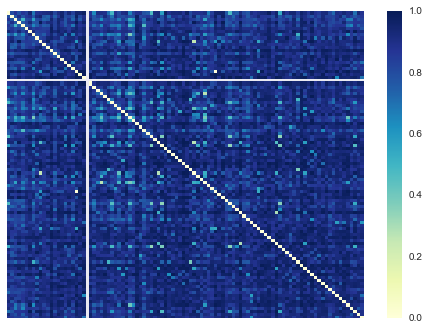

In [9]:
met
import seaborn as sns;
import matplotlib.pyplot as plt

ax = sns.heatmap(cos_result_distance, xticklabels = False, yticklabels = False, vmin = 0, vmax = 1, cmap="YlGnBu")
plt.show()